In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as c
import scipy.fftpack as fft
import scipy.ndimage as ndi
import scipy as sp
from PIL import Image

def px_remove(array, x, y):
    temp = array
    temp[y,x]=(temp[y+1,x]+temp[y-1,x]+temp[y,x+1]+temp[y,x-1])/4
    return temp

def px_remove_edge(array, x, y):
    temp = array
    temp[y,x]=(temp[y+1,x]+temp[y-1,x]+temp[y,x-1])/3
    return temp

# Load Data

In [6]:
%matplotlib notebook

fields = ['20','40','50','55','60','65','70','75','80']

FC_list = []

for i in np.arange(0,len(fields),1):
    pos_im = Image.open("STXM_Data/FC_Different_IP_Fields/TIF_Data/FC_IP_"+fields[i]+"mT_pos.tif")
    neg_im = Image.open("STXM_Data/FC_Different_IP_Fields/TIF_Data/FC_IP_"+fields[i]+"mT_neg.tif")
    pos =np.array(pos_im)
    neg =np.array(neg_im)

    pos = np.rot90(pos)
    neg = np.rot90(neg)

    final = pos/neg
    final = np.fliplr(final)
    
    im=Image.fromarray(final)
    #im.save("FC_images/FC_"+str(i)+".tiff")
    FC_list.append(final)

/var/folders/gl/y5z38x5d35n864qlp7vb6sx80000gp/T/ipykernel_15016/1461689380.py:16: RuntimeWarning: divide by zero encountered in true_divide
  final = pos/neg


In [7]:
FC_final_list = []
temp1 = px_remove(FC_list[0], 67, 23)
temp2 = px_remove(temp1, 68, 23)
temp3 = px_remove(temp2, 67, 23)
temp4 = px_remove(temp3, 67, 23)
temp5 = px_remove(temp4, 67, 22)
temp6 = px_remove(temp5, 68, 22)

FC_final_list.append(temp6)

# -250 mT #
temp1 = px_remove(FC_list[3], 130, 17)

# -250 mT #
temp1 = px_remove(FC_list[4], 167, 21)

# -250 mT #
temp1 = px_remove(FC_list[5], 161, 25)

# -250 mT #
temp1 = px_remove(FC_list[6], 31, 23)


<IPython.core.display.Javascript object>


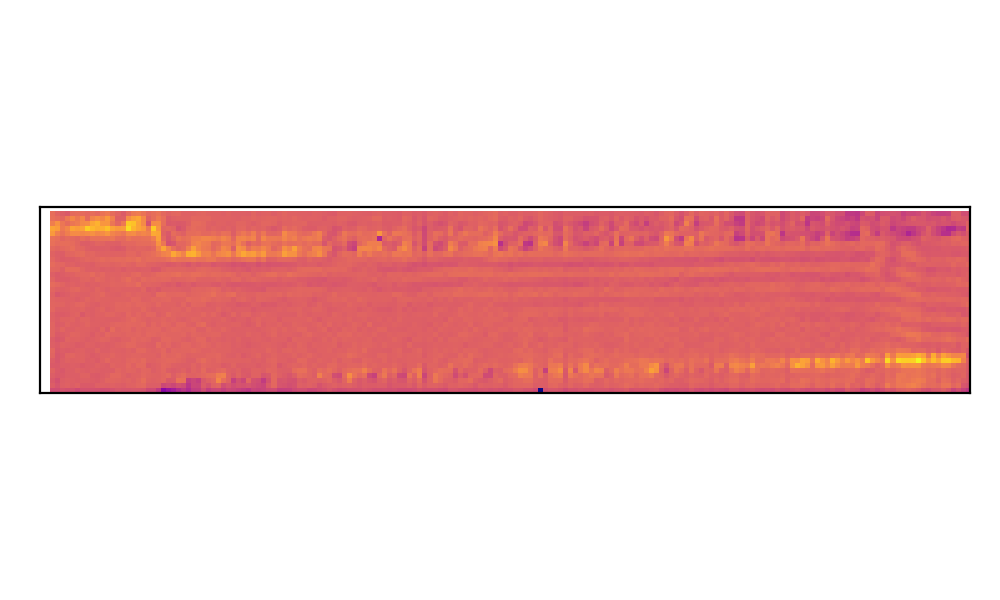

In [8]:
%matplotlib notebook
plt.figure(figsize=(5,3))

ax1=plt.subplot2grid((1,1),(0,0), rowspan=1,colspan=1)
plt.imshow(FC_list[8][:,:],cmap='plasma')
plt.xticks([])
plt.yticks([])

plt.tight_layout()


<IPython.core.display.Javascript object>


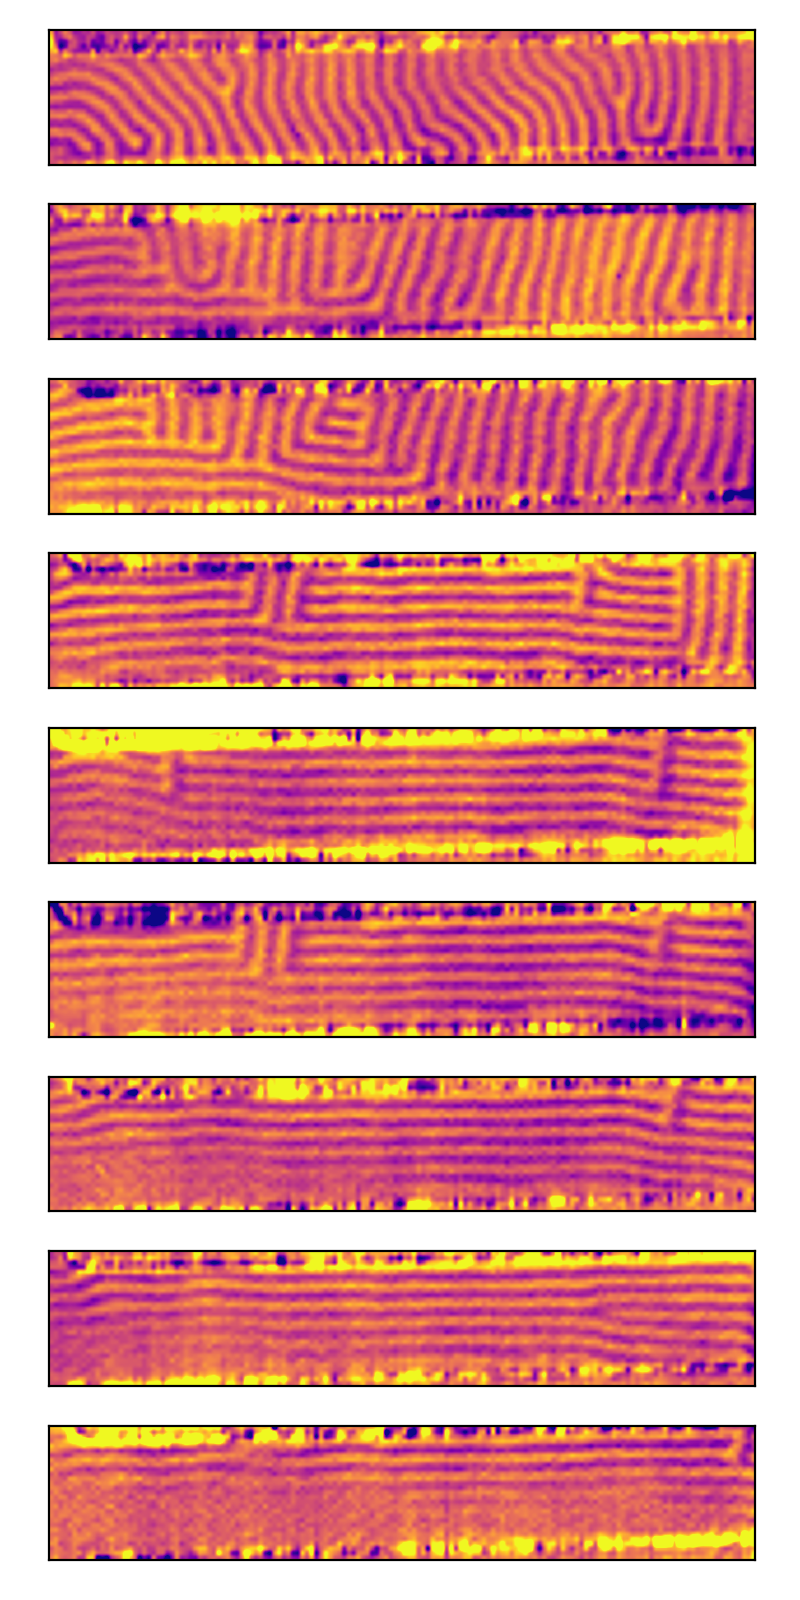

In [9]:

plt.figure(figsize=(4,8))

# 20 mT #
ax1=plt.subplot2grid((9,1),(0,0), rowspan=1,colspan=1)
plt.imshow(FC_list[0][2:-6,14:-19],cmap='plasma',interpolation='hamming',vmin=0.92,vmax=1.08)
plt.xticks([])
plt.yticks([])
#plt.colorbar()
 
# 40 mT #
ax1=plt.subplot2grid((9,1),(1,0), rowspan=1,colspan=1)
plt.imshow(FC_list[1][2:-6,17:-16],cmap='plasma',interpolation='hamming',vmin=0.91,vmax=1.05)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

# 50 mT #
ax1=plt.subplot2grid((9,1),(2,0), rowspan=1,colspan=1)
plt.imshow(FC_list[2][6:-2,17:-16],cmap='plasma',interpolation='hamming',vmin=0.93,vmax=1.06)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

# 55 mT #
ax1=plt.subplot2grid((9,1),(3,0), rowspan=1,colspan=1)
plt.imshow(FC_list[3][6:-2,19:-14],cmap='plasma',interpolation='hamming',vmin=0.92,vmax=1.02)
plt.xticks([])
plt.yticks([])
#plt.colorbar()
 
# 60 mT #
ax1=plt.subplot2grid((9,1),(4,0), rowspan=1,colspan=1)
plt.imshow(FC_list[4][1:-7,19:-14],cmap='plasma',interpolation='hamming',vmin=0.91,vmax=1.01)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

# 65 mT #
ax1=plt.subplot2grid((9,1),(5,0), rowspan=1,colspan=1)
plt.imshow(FC_list[5][3:-5,19:-14],cmap='plasma',interpolation='hamming',vmin=0.94,vmax=1.05)
plt.xticks([])
plt.yticks([])
#plt.colorbar()
 
# 70 mT #
ax1=plt.subplot2grid((9,1),(6,0), rowspan=1,colspan=1)
plt.imshow(FC_list[6][3:-5,21:-12],cmap='plasma',interpolation='hamming',vmin=0.91,vmax=1.02)
plt.xticks([])
plt.yticks([])
#plt.colorbar()
 
# 75 mT #
ax1=plt.subplot2grid((9,1),(7,0), rowspan=1,colspan=1)
plt.imshow(FC_list[7][5:-3,19:-14],cmap='plasma',interpolation='hamming',vmin=0.92,vmax=1.03)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

# 80 mT #
ax1=plt.subplot2grid((9,1),(8,0), rowspan=1,colspan=1)
plt.imshow(FC_list[8][6:-2,19:-14],cmap='plasma',interpolation='hamming',vmin=0.95,vmax=1.04)
plt.xticks([])
plt.yticks([])
#plt.colorbar()
 
plt.tight_layout()

plt.savefig('Figure_Panels/Extended_Data_FC_Diff_Field.png',dpi=300)